# Линейные модели в машинном обучении

<a id='task'></a>
## Постановка задачи

**Тема проекта:**

Разработка двух прогнозных моделей для отбора бурёнок в поголовье:
- прогноз возможного удоя коровы (целевой признак `Удой`);
- рассчет вероятности получить вкусное молоко от коровы (целевой признак `Вкус молока`).

### Назначение

**Цель проекта:** отобрать коров по моделям машинного обучения по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

### Структура проекта
1. [Постановка задачи][1]
    1. Назначение
    2. Структура проекта
    3. Описание данных
2. [Общая информация о данных][2]
    1. [Загрузка данных][2.1]
    2. [Изучение общей информации][2.2]
3. [Предобработка данных][3]
    1. [Дубликаты][3.1]
    2. [Единицы измерения][3.2]
4. [Исследовательский анализ данных][4]
    1. [Анализ характеристик из main_ferma][4.1]
    2. [Анализ характеристик из dad_ferma][4.2]
    3. [Анализ характеристик из cow_buy][4.3]
5. [Корреляционный анализ признаков в датасете main_ferma][5]
6. [Задача регрессии][6]
    1. [Первая модель][6.1]
        1. [Подготовка данных][6.1.1]
        2. [Обучение модели линейной регрессии][6.1.2]
        3. [Оценка качества модели][6.1.3]
    2. [Вторая модель][6.2]
        1. [Подготовка данных второй модели][6.2.1]
        2. [Обучение второй модели линейной регрессии][6.2.2]
        3. [Оценка качества второй модели][6.2.3]
    3. [Третья модель][6.3]
        1. [Подготовка данных третьей модели][6.3.1]
        2. [Обучение третьей модели линейной регрессии][6.3.2]
        3. [Оценка качества третьей модели][6.3.3]
    4. [Оценка качества моделей по метрикам][6.4]
    5. [Прогноз удоя коров][6.5]
7. [Задача классификации][7]
    1. [Подготовка данных][7.1]
    2. [Обучение модели логической регрессии][7.2]
    3. [Оценка качества модели][7.3]
    4. [Прогноз вкуса молока][7.4]
8. [Общие выводы][8]

[1]:#task
[2]:#general
[2.1]:#load
[2.2]:#info
[3]:#preprocess
[3.1]:#dupl
[3.2]:#types
[4]:#research
[4.1]:#main_feat
[4.2]:#dad_feat
[4.3]:#cow_feat
[5]:#corr
[6]:#reg
[6.1]:#mod
[6.1.1]:#prep
[6.1.2]:#linar
[6.1.3]:#qlt
[6.2]:#mod2
[6.2.1]:#prep2
[6.2.2]:#linar2
[6.2.3]:#qlt2
[6.3]:#mod3
[6.3.1]:#prep3
[6.3.2]:#linar3
[6.3.3]:#qlt3
[6.4]:#metr
[6.5]:#predict
[7]:#class
[7.1]:#prep_c
[7.2]:#log
[7.3]:#qlt_c
[7.4]:#predict2
[8]:#fin

### Описание данных

Работаем с тремя датасетами: `ferma_main.csv`, `ferma_dad.csv`, `cow_buy.csv`.

**Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент.**

Описание данных:
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (`вкусно`, `не вкусно`).
- `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Признаки в датасете `ferma_main.csv` можно разделить на группы.
- Характеристики коровы: `id, Порода, порода папы_быка, Возраст`.
- Характеристики корма: `ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение)`.
- Характеристика пастбища: `Тип пастбища`.
- Характеристики молока: `Удой, кг, Жирность,%, Белок,%, Вкус молока`.

Такое разделение поможет понять, как взаимосвязаны признаки в датасете.

**Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера.** 

Описание данных:
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

**Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.** 

Описание данных:
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (`менее_2_лет`, `более_2_лет`).

Данные в файлах `ferma_main.csv` и `cow_buy.csv` похожи, но у датасета `cow_buy.csv` несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать!

<a id='general'></a>
## Общая информация о данных

<a id='load'></a>
### Загрузка данных

In [1]:
# импорт библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix, 
    accuracy_score,
    recall_score, 
    precision_score
)

import scipy.stats as st
from scipy.stats import spearmanr

RANDOM_STATE=53

In [2]:
# функция считывания датафрейма
def read_dfs(path, name):
    for i in path:
        if os.path.exists(i+name):
            return pd.read_csv(i+name, sep=';', decimal=',')
    return print('File not found')

In [3]:
# считываем датафреймы
paths = ['/datasets/', 'C:\\Users\\Admin\\YandexDisk\\']

df_name = 'ferma_main.csv'
main_ferma = read_dfs(paths, df_name)

df_name = 'ferma_dad.csv'
dad_ferma = read_dfs(paths, df_name)

df_name = 'cow_buy.csv'
cow_buy = read_dfs(paths, df_name)

In [4]:
# подготовка графиков

sns.set(rc={'figure.figsize':(10, 7)}, palette='Set1', font_scale=0.95)
sns.set_style(rc = {'axes.facecolor': '#e9e9f0'})

<a id='info'></a>
### Изучение общей информации

In [5]:
# функция вывода общей инфо о датафрейме
def df_info(df):
    print(df.info())
    return df.head()

Датафрейм `main_ferma`.

In [6]:
df_info(main_ferma)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


**Вывод:** пропусков нет, типы данных правильные.

Датафрейм `dad_ferma`.

In [7]:
df_info(dad_ferma)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


**Вывод:** пропусков нет, типы данных правильные.

Датафрейм `cow_buy`.

In [8]:
df_info(cow_buy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
None


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод:** пропусков нет, типы данных в столбцах верные.

In [9]:
# функция для переименования столбцов
def rename_clmn(df):
    df.columns = df.columns.str.replace(', ', '_')
    df.columns = df.columns.str.replace(',', '_')
    df.columns = df.columns.str.replace(' ', '_')
    return df.rename(columns=lambda x: x.lower())

In [10]:
main_ferma = rename_clmn(main_ferma)

main_ferma.columns = main_ferma.columns\
.str.replace('_(энергетическая_кормовая_единица)', '', regex=False)
main_ferma.columns = main_ferma.columns\
.str.replace('_(сахаро-протеиновое_соотношение)', '', regex=False)

main_ferma.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [11]:
dad_ferma = rename_clmn(dad_ferma)
dad_ferma.head()

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [12]:
cow_buy = rename_clmn(cow_buy)
cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Вывод:** при осмотре данных были изменены названия столбцов (приведены к стандартому виду), пропусков в столбцах датафреймов нет, типы данных правильные.

<a id='preprocess'></a>
## Предобработка данных

<a id='dupl'></a>
### Дубликаты

Проверяем наличие явных дубликатов.

In [13]:
print('Кол-во дубликатов в main_ferma:', main_ferma.duplicated().sum())
print('Кол-во дубликатов в dad_ferma:', dad_ferma.duplicated().sum())
print('Кол-во дубликатов в cow_buy:', cow_buy.duplicated().sum())

Кол-во дубликатов в main_ferma: 5
Кол-во дубликатов в dad_ferma: 0
Кол-во дубликатов в cow_buy: 4


В таблице `cow_buy` всего 20 записей, возможно, что это разные коровы с одинаковыми признаками, поэтому эти дубликаты стоит оставить.

In [14]:
# удаляем явные дубликаты
main_ferma = main_ferma.drop_duplicates().reset_index(drop=True)

# проверяем
print('Кол-во дубликатов в main_ferma:', main_ferma.duplicated().sum())

Кол-во дубликатов в main_ferma: 0


Проверяем наличие неявных дубликатов.

In [15]:
# функция проверки всех уникальных имен
# категориальных переменных датафрейма
def all_uni_col(df, clmn):
    for i in clmn:
        print(df[i].unique())
    return print(' ')

In [16]:
check_col = ['имя_папы']
all_uni_col(dad_ferma, check_col)

check_col = ['порода', 'тип_пастбища', 
             'порода_папы_быка', 'вкус_молока', 'возраст']
all_uni_col(main_ferma, check_col)

check_col = ['порода', 'тип_пастбища', 
             'порода_папы_быка', 'имя_папы', 'возраст']
all_uni_col(cow_buy, check_col)

['Буйный' 'Соловчик' 'Барин' 'Геркулес']
 
['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']
 
['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']
 


Изавляемя от неявных дубликатов в датафрейме `main_ferma` (столбцы `тип_пастбища` и `порода_папы_быка`).

In [17]:
main_ferma['порода_папы_быка'] = main_ferma['порода_папы_быка']\
.str.replace('Айдиалл', 'Айдиал')
main_ferma['тип_пастбища'] = main_ferma['тип_пастбища']\
.str.lower().replace('равнинные', 'равнинное')

#проверяем
check_col = ['порода_папы_быка', 'тип_пастбища']
all_uni_col(main_ferma, check_col)

['Айдиал' 'Соверин']
['равнинное' 'холмистое']
 


<a id='types'></a>
### Единицы измерения 

In [18]:
df_info(main_ferma)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой_кг           629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин_г   629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность_%        629 non-null    float64
 9   белок_%           629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB
None


,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


Приведем `удой_кг` и `сырой_протеин_г` к одной системе исчисления - к кг.

In [19]:
main_ferma['сырой_протеин_г'] = main_ferma['сырой_протеин_г'] / 1000

main_ferma.columns = main_ferma.columns\
.str.replace('_г', '_кг', regex=False)

In [20]:
#проверка
df_info(main_ferma)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой_кг           629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин_кг  629 non-null    float64
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность_%        629 non-null    float64
 9   белок_%           629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 59.1+ KB
None


,id,удой_кг,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1.743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2.138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1.854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2.012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1.675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


**Вывод:** в результате предобработки данных были удалены явные и неявные дубликаты и приведены к одной единице измерения граммы и килограммы (к кг).

<a id='research'></a>
## Исследовательский анализ данных

Проведем статистический анализ всех признаков.

In [21]:
# функция графика для категориальных признаков
def get_catplot(df, feature):
    sns.catplot(
        data=df,
        x=feature,
        kind='count',
        height=3.5, 
        aspect=1.5,
    )
    plt.title('Распределение по признаку')
    plt.ylabel('кол-во коров')
    return plt.plot();

<a id='main_feat'></a>
### Анализ характеристик из main_ferma

Построим графики количественных признаков и проведем для них статистический анализ.

In [22]:
main_ferma_quanti = main_ferma\
.loc[:, ['эке', 'сырой_протеин_кг', 'спо', 'жирность_%', 'белок_%']]

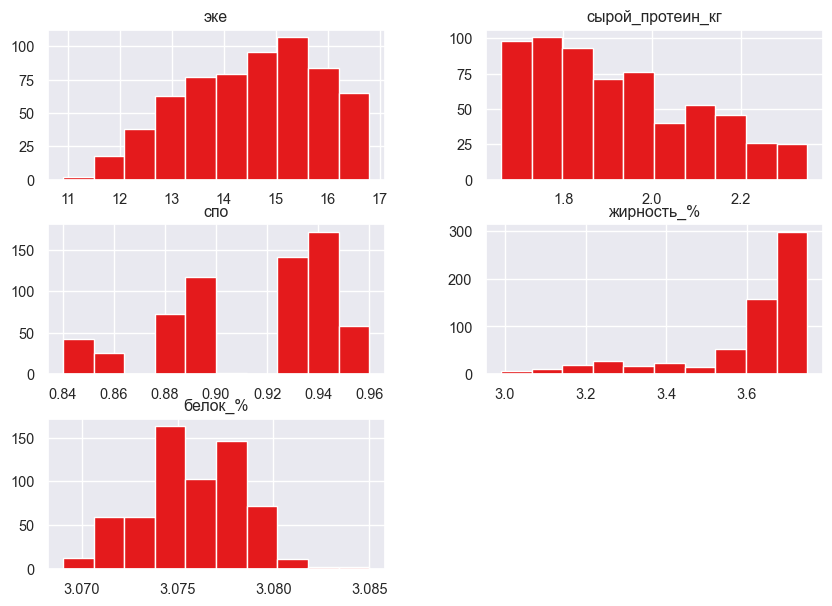

In [23]:
main_ferma_quanti.hist();

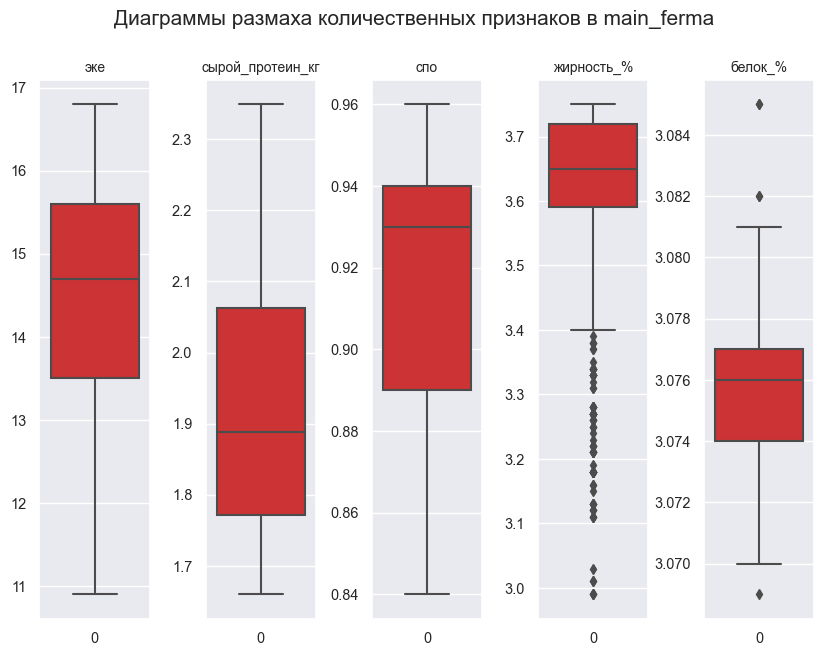

In [24]:
fig, axes = plt.subplots(1, 5)
fig.suptitle('Диаграммы размаха количественных признаков в main_ferma', 
             fontsize=15)

for i, feature in enumerate(main_ferma_quanti.columns):
    sns.boxplot(data=main_ferma_quanti[feature], ax=axes[i])
    axes[i].set_title(feature, fontsize=10)
# расстояния между графиками
plt.subplots_adjust(wspace=0.5)
plt.plot();

In [25]:
main_ferma_quanti.describe()

,эке,сырой_протеин_кг,спо,жирность_%,белок_%
count,629.000000,629.000000,629.000000,629.000000,629.000000
mean,14.543879,1.923364,0.913116,3.603657,3.075671
std,1.306408,0.182956,0.032203,0.168656,0.002549
min,10.900000,1.660000,0.840000,2.990000,3.069000
25%,13.500000,1.771000,0.890000,3.590000,3.074000
50%,14.700000,1.888000,0.930000,3.650000,3.076000
75%,15.600000,2.062000,0.940000,3.720000,3.077000
max,16.800000,2.349000,0.960000,3.750000,3.085000


**Вывод:** есть значения, выходящие за предел "усов" графика, - в столбцах `жирность_%` (процент содержания жиров в молоке менее 3.4%) и `белок_%` (процент содержания белков в молоке менее 3.070% или более 3.081%). Во всех столбцах среднее и медиана практически равны друг другу.

Средние показатели равны:
- эке (показатель питательности корма коровы) - 14.7
- содержание сырого протеина в корме - 1.89
- отношение сахара к протеину в корме коровы - 0.93
- содержание жиров в молоке - 3.65%
- содержание белков в молоке - 3.076%

У признаков  `сырой_протеин_кг`, `спо` и `жирность_%` распределение не нормальное.

Построим графики категориальных признаков.

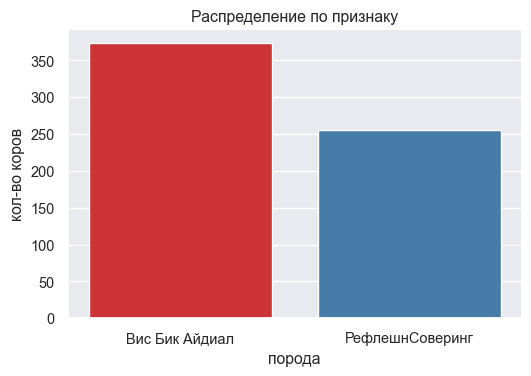

In [26]:
get_catplot(main_ferma, 'порода');

Порода Вис Бик Айдал встречается у фермера чаще, чем РефлешнСоверинг, (в отношении  примерно 1/3).

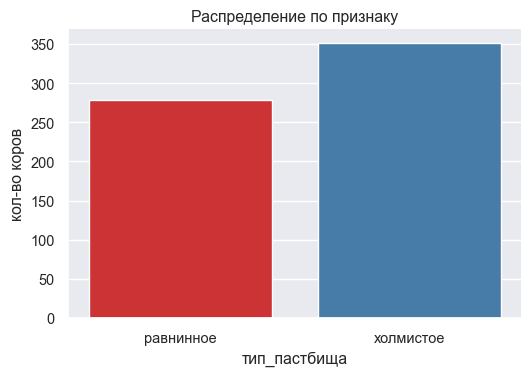

In [27]:
get_catplot(main_ferma, 'тип_пастбища');

Холмистый тип пастбища преобладает.

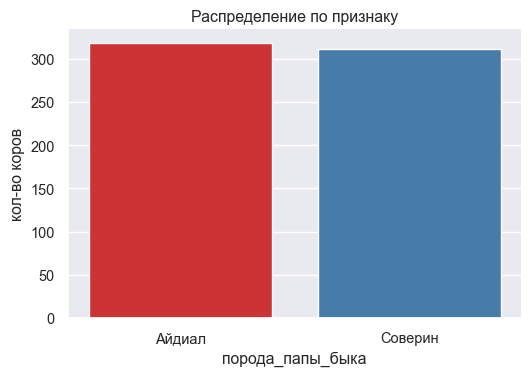

In [28]:
get_catplot(main_ferma, 'порода_папы_быка');

Породы пап-быков распределены примерно одинаково, но Айдиал чуть лидирует.

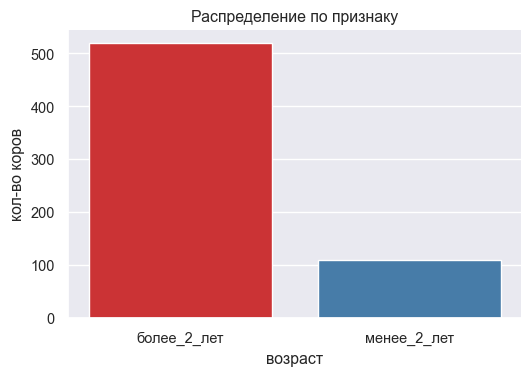

In [29]:
get_catplot(main_ferma, 'возраст');

Возраст коровы чаще более 2-х лет. Это связано с тем, что количетво удоя зависит от количества телят.

**Вывод:** среднестатистическая корова - Вис Бик Айдиал, её отец-бык - Айдиал или Соверин, она старше двух лет и посется на холмистом пастбище.

Поссмотрим на распределение целевого признака `вкус_молока`.

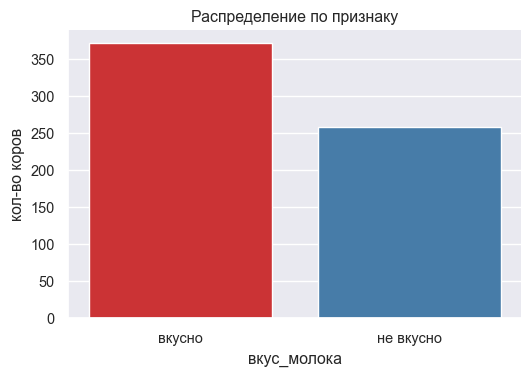

In [30]:
get_catplot(main_ferma, 'вкус_молока');

Вкус у молока чаще "вкусный".

Построим график второго целевого признака `удой_кг`.

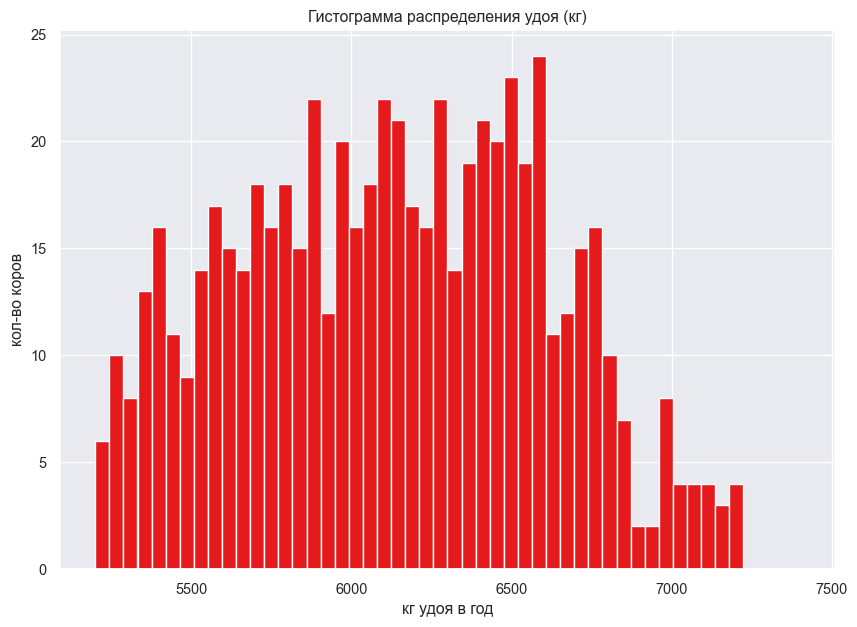

In [31]:
main_ferma['удой_кг'].hist(bins=50, range=(5200, 7400))
plt.title('Гистограмма распределения удоя (кг)')
plt.xlabel('кг удоя в год')
plt.ylabel('кол-во коров');

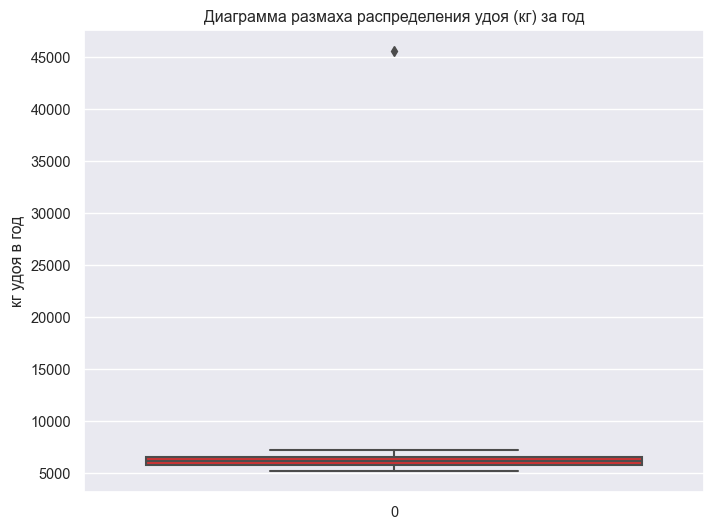

In [32]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=main_ferma['удой_кг'])
plt.title('Диаграмма размаха распределения удоя (кг) за год')
plt.ylabel('кг удоя в год');

In [33]:
main_ferma[main_ferma['удой_кг'] >= 10000]

,id,удой_кг,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
16,17,45616,11.5,1.675,0.93,Вис Бик Айдиал,холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


Больше 10 000 кг удоя за год - аномалия (а в данных 45 616 кг). К сожалению, невозможно предположить, какое здесь должно быть значение. Чтобы выброс не испортил дальнейшие операции над данными, избавимся от него.

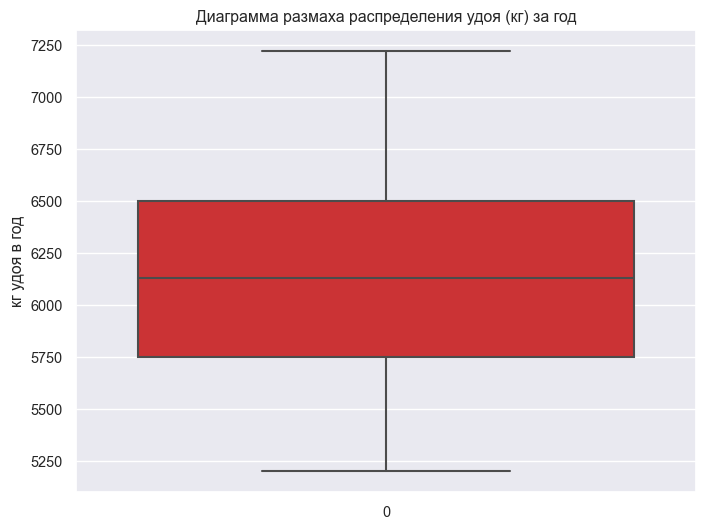

In [34]:
main_ferma = main_ferma.query('удой_кг < 10000')

plt.figure(figsize=(8, 6))

sns.boxplot(data=main_ferma['удой_кг'])
plt.title('Диаграмма размаха распределения удоя (кг) за год')
plt.ylabel('кг удоя в год');

In [35]:
main_ferma['удой_кг'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64

Среднее и медиана почти равны - в год в среднем корова дает 6125-6132 кг удоя. Минимальное значение - 5204 кг, а максимальное - 7222 кг.

<a id='dad_feat'></a>
### Анализ характеристик из dad_ferma

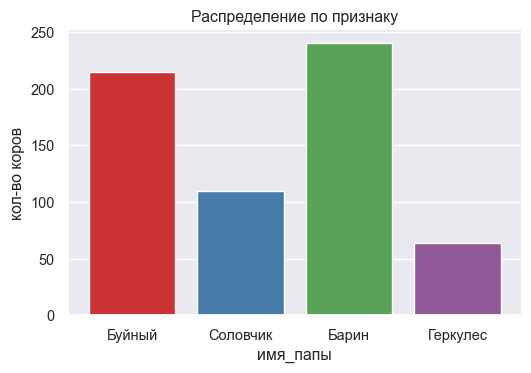

In [36]:
get_catplot(dad_ferma, 'имя_папы');

Больше всего детей у Барина и Буйного, меньше всего у Геркулеса.

<a id='cow_feat'></a>
### Анализ характеристик из cow_buy

Построим графики количественных признаков и проведем для них статистический анализ.

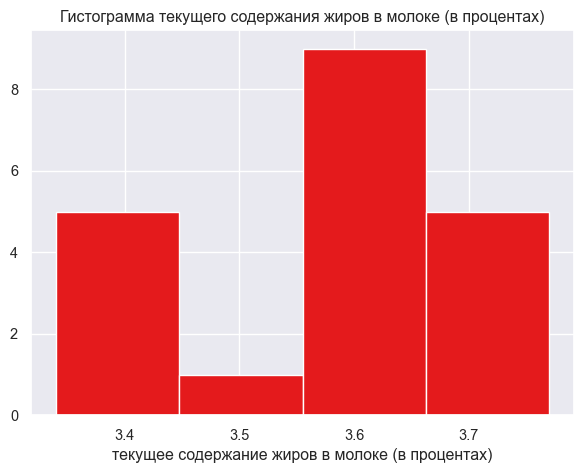

In [37]:
cow_buy['текущая_жирность_%'].hist(bins=4, figsize=(7,5))

plt.title('Гистограмма текущего содержания жиров в молоке (в процентах)')
plt.xlabel('текущее содержание жиров в молоке (в процентах)');

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность_%, dtype: float64


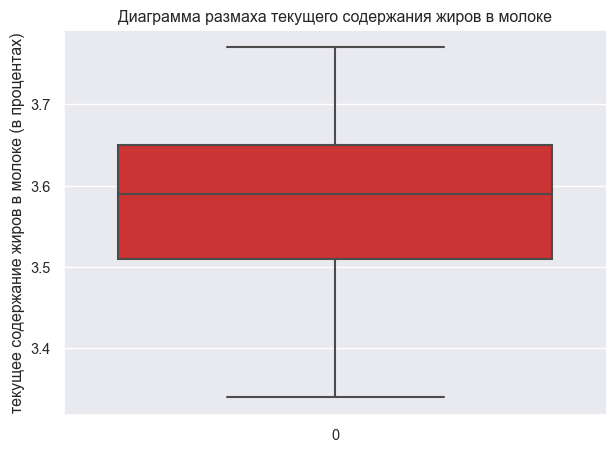

In [38]:
plt.figure(figsize=(7, 5))

sns.boxplot(data=cow_buy['текущая_жирность_%'])
plt.title('Диаграмма размаха текущего содержания жиров в молоке')
plt.ylabel('текущее содержание жиров в молоке (в процентах)');

print(cow_buy['текущая_жирность_%'].describe())

Распределение процента жиров в молоке примерно одинаково, исключение составляет значение 3.5 - такого молока очень мало. Обычно процент жиров в молоке равен 3.59%.

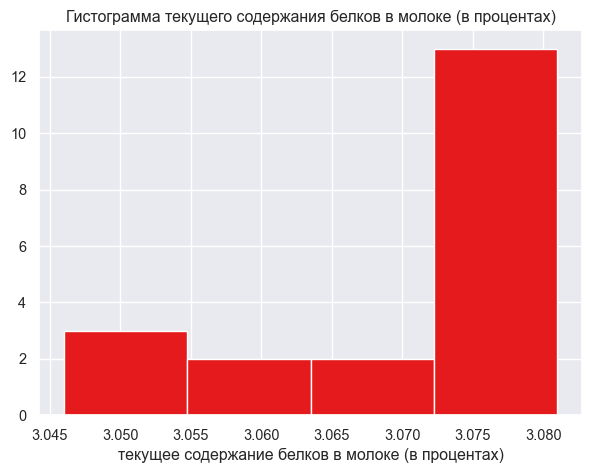

In [39]:
cow_buy['текущий_уровень_белок_%'].hist(bins=4, figsize=(7,5))

plt.title('Гистограмма текущего содержания белков в молоке (в процентах)')
plt.xlabel('текущее содержание белков в молоке (в процентах)');

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок_%, dtype: float64


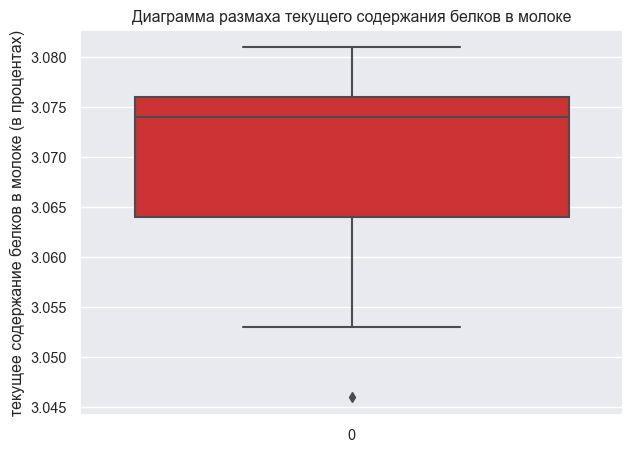

In [40]:
plt.figure(figsize=(7, 5))

sns.boxplot(data=cow_buy['текущий_уровень_белок_%'])
plt.title('Диаграмма размаха текущего содержания белков в молоке')
plt.ylabel('текущее содержание белков в молоке (в процентах)');

print(cow_buy['текущий_уровень_белок_%'].describe())

Чаще всего молоко содержит 3.074% белков.

Построим графики категориальных признаков.

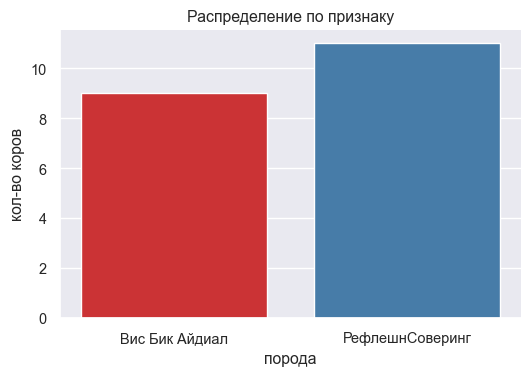

In [41]:
get_catplot(cow_buy, 'порода');

Проеобладающая порода - РефлешнСоверинг.

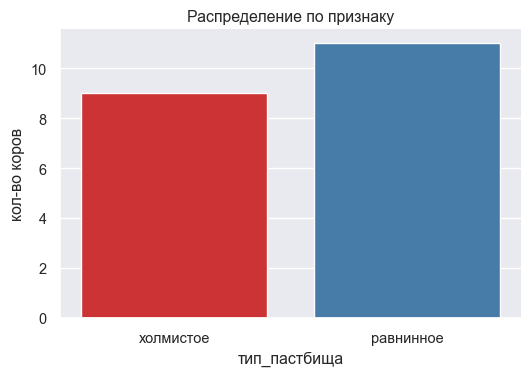

In [42]:
get_catplot(cow_buy, 'тип_пастбища');

Чаще тип пастбища - равнинное.

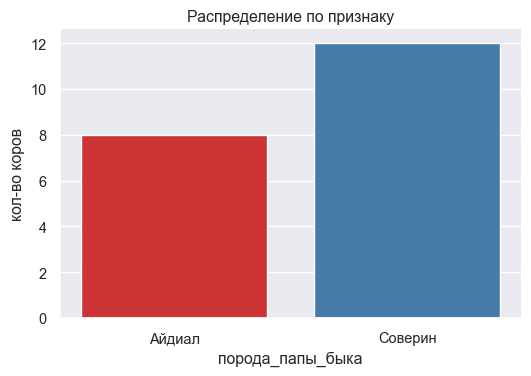

In [43]:
get_catplot(cow_buy, 'порода_папы_быка');

Чаще порода папы быка - Соверин.

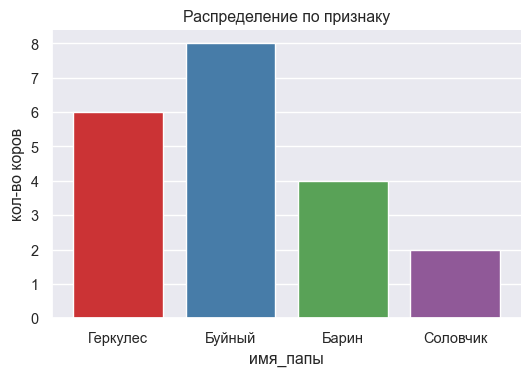

In [44]:
get_catplot(cow_buy, 'имя_папы');

Больше всего детей у Буйного и Геркулеса, у Соловчика - меньше всего.

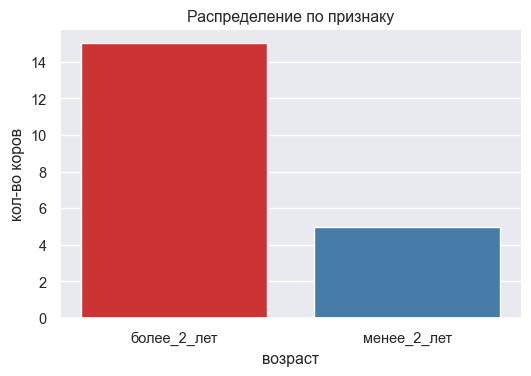

In [45]:
get_catplot(cow_buy, 'возраст');

Намного больше коров, возраст которых больше 2-х лет.

**Общий вывод:** в результате исследовательского анализа данных было найдено аномальное значение 45 616 кг удоя за год. Скорее всего, это техническая ошибка. Невозможно предположить, как должны выглядеть данные, поэтому они были удалены.

В ходе **статистического анализа данных** получены следующие выводы: 
**По данным фермера** оптимальные значения равны:
- эке (показатель питательности корма коровы) - 14.7;
- содержание сырого протеина в корме - 1.89;
- отношение сахара к протеину в корме коровы - 0.93;
- содержание жиров в молоке - 3.65%;
- содержание белков в молоке - 3.076%.

- среднестатистическая корова - породы Вис Бик Айдиал, её отец-бык - породы Айдиал или Соверин - Барин или Буйный, она старше двух лет и посется на холмистом пастбище;
- молоко чаще всего "вкусное";
- в среднем в год корова дает 6125-6132 кг удоя.

**По данным "ЭкоФермы"** оптимальные значения равны:
- содержание жиров в молоке - 3.59%;
- содержание белков в молоке - 3.073%.

- среднестатистическая корова - породы РефлешнСоверинг, её отец - породы Соверин - Буйный или Геркулес, она старше двух лет и посется на равнинном пастбище.

<a id='corr'></a>
## Корреляционный анализ признаков в датасете main_ferma

Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции **Спирмена** между всеми признаками.

In [46]:
spear_corr = main_ferma.drop(['id'], 
                    axis=1)

In [47]:
rho, p_value = st.spearmanr(spear_corr)

# создаем датафрейм для хитмапа
rho_df = pd.DataFrame(
    rho,
    index=spear_corr.columns,
    columns=spear_corr.columns
)

print('Корреляционная матрица Спирмена:',)
rho_df

Корреляционная матрица Спирмена:


,удой_кг,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
удой_кг,1.000000,0.765144,0.437543,0.787904,0.070471,0.118968,-0.385846,0.688506,-0.005701,-0.102273,-0.647025
эке,0.765144,1.000000,0.384747,0.741962,0.096492,0.098530,-0.088061,0.686973,-0.013321,-0.225177,-0.529561
сырой_протеин_кг,0.437543,0.384747,1.000000,0.485890,0.004782,0.071204,-0.009592,0.392822,0.229051,-0.145765,-0.292011
спо,0.787904,0.741962,0.485890,1.000000,0.061464,0.039412,-0.166183,0.701044,0.109924,-0.259041,-0.506498
порода,0.070471,0.096492,0.004782,0.061464,1.000000,0.145647,0.072739,0.062995,-0.278735,-0.007719,-0.058319
тип_пастбища,0.118968,0.098530,0.071204,0.039412,0.145647,1.000000,0.004309,-0.053559,0.115167,-0.181083,-0.095354
порода_папы_быка,-0.385846,-0.088061,-0.009592,-0.166183,0.072739,0.004309,1.000000,-0.007479,-0.052634,0.001505,0.239013
жирность_%,0.688506,0.686973,0.392822,0.701044,0.062995,-0.053559,-0.007479,1.000000,0.043125,-0.135244,-0.474238
белок_%,-0.005701,-0.013321,0.229051,0.109924,-0.278735,0.115167,-0.052634,0.043125,1.000000,-0.115930,-0.003979
вкус_молока,-0.102273,-0.225177,-0.145765,-0.259041,-0.007719,-0.181083,0.001505,-0.135244,-0.115930,1.000000,0.117584


Построим хитмап для лучшей визуализации.

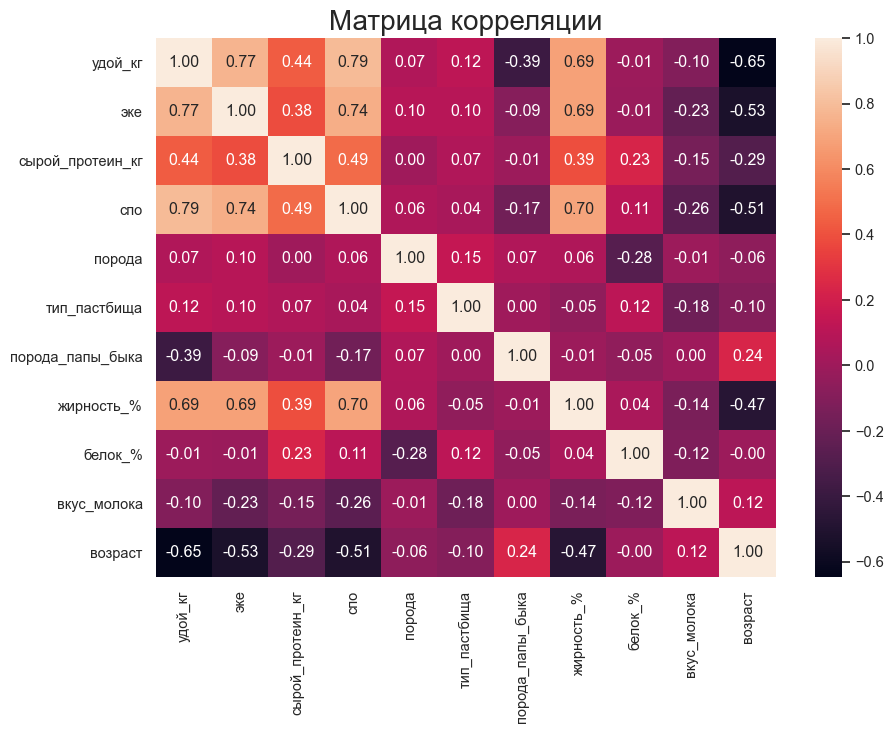

In [48]:
#sns.heatmap(main_ferma.corr(), annot=True, fmt=".2f")
sns.heatmap(rho_df, annot=True, fmt=".2f")

plt.title('Матрица корреляции', fontsize=20);

**Большая корреляция (1.00-0.50)** прослеживается между:
- `удоем (кг)` и отношением сахара к протеину в корме коровы (`спо`),  показателем питательности корма коровы (`эке`), `процентном содержании жиров в молоке` и `возрастом` коровы.
- показателем питательности корма коровы (`эке`) и `удоем (кг)`, отношением сахара к протеину в корме коровы (`спо`), `процентным содержанием жиров в молоке` и `возрастом` коровы.
- отношением сахара к протеину в корме коровы (`спо`) и `удоем (кг)`, показателем питательности корма коровы (`эке`), `процентном содержании жиров в молоке` и `возрастом` коровы.
- `процентным содержанием жиров в молоке` и отношением сахара к протеину в корме коровы (`спо`), показателем питательности корма коровы (`эке`) и `удоем (кг)`.
- `возрастом` коровы и `удоем (кг)`, показателем питательности корма коровы (`эке`) и отношением сахара к протеину в корме коровы (`спо`).

**Небольшая корреляция (0.49-0.20)** есть между: 
- `удоем (кг)` и `содержанием сырого протеина в корме` и `породой папы быка`.
- показателем питательности корма коровы (`эке`) и `содержанием сырого протеина в корме` и `вкусом молока`.
- `содержанием сырого протеина в корме` и отношением сахара к протеину в корме коровы (`спо`), `удоем (кг)`, `процентным содержанием жиров в молоке`,  показателем питательности корма коровы (`эке`) и `возрастом` коровы.
- отношением сахара к протеину в корме коровы (`спо`) и отношением сахара к протеину в корме коровы (`спо`) и `вкусом молока`.
- `породой` и `процентным содержанием белков в молоке`.
- `породой папы быка` и `удоем (кг)`, `возрастом` коровы.
- `процентном содержании жиров в молоке` и `возрастом` коровы, `содержанием сырого протеина в корме`, 
- `процентном содержании белков в молоке`и `породой`.
- `вкусом молока` и и отношением сахара к протеину в корме коровы (`спо`), показателем питательности корма коровы (`эке`).
- `возрастом` коровы и `процентным содержанием жиров в молоке`, `содержанием сырого протеина в корме` и `породой папы быка`.

Мультиколлинеарность - сильная линейная взаимосвязь между входными признаками. О ней говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. Таких коэффициентов в данной выборке нет, значит, **мультиколлинеарности нет.**

Построим диаграммы рассеяния для признака `удой_кг`  всех количественных признаков с учётом значения категориальных признаков.

- количественные: `эке`, `сырой_протеин_кг`, `спо`, `жирность_%`, `белок_%`
- категориальные: `порода`, `тип_пастбища`, `порода_папы_быка`, `вкус_молока`, `возраст`

In [49]:
# функция построения графика рассеяния для удоя
def scatter_for_milk(feat, cat):
    plt.figure(figsize=(4, 3))
    sns.scatterplot(
        data=main_ferma,
        x='удой_кг',
        y=feat, 
        hue=cat,
        alpha=0.5,
    );
    plt.title('Диаграмма рессеяния')

In [50]:
# функция построения графика для всех категориальных признаков
def scatter_for_cat(feat):
    for elm in ctg:
        scatter_for_milk(feat, elm) 

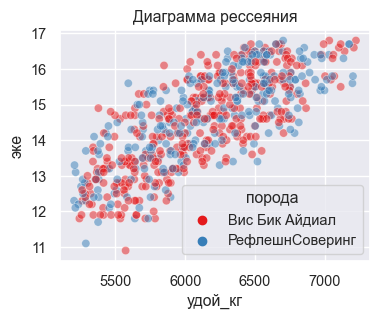

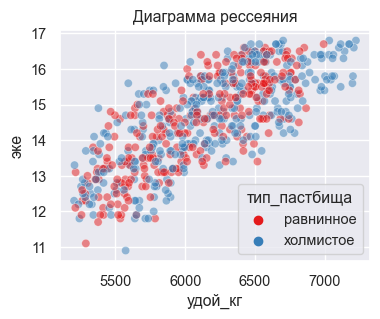

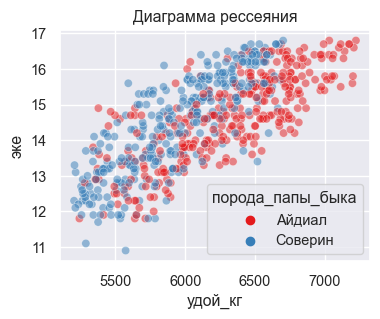

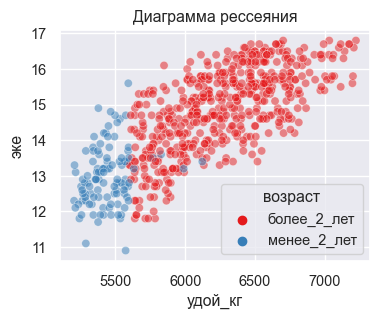

In [51]:
ctg = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']

scatter_for_cat('эке')

**Вывод:** Между целевым признаком `удой_кг` и входным признаком `эке` (показатель питательности корма коровы) с учетом значения категориальных признаков прослеживается положительная квадратичная взаимосвязь.

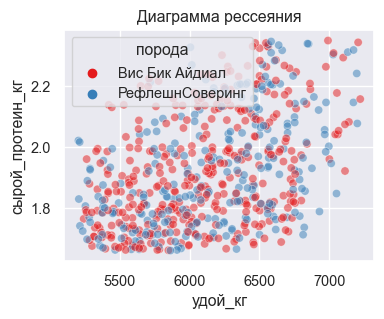

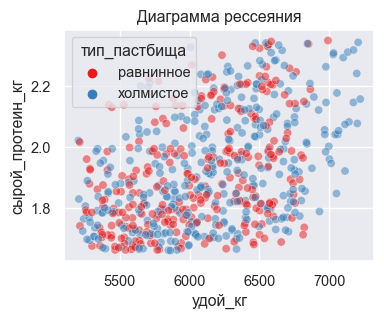

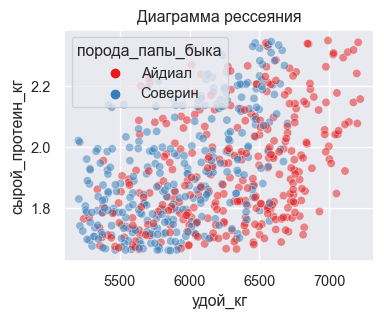

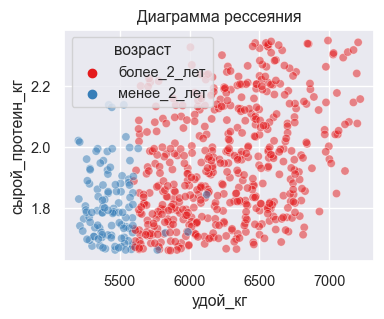

In [52]:
scatter_for_cat('сырой_протеин_кг')

**Вывод:** Между целевым признаком `удой_кг` и входным признаком `сырой_протеин_кг` (содержание сырого протеина в корме (в кг)) с учетом значения категориальных признаков прослеживается слабая положительная линейная взаимосвязь.

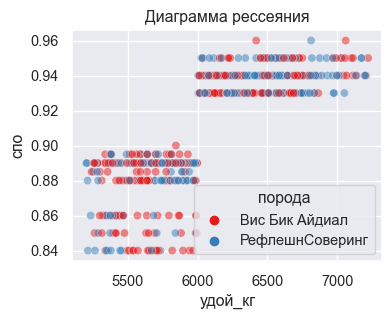

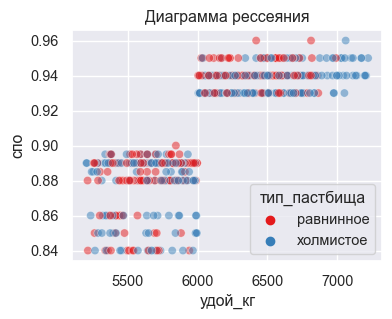

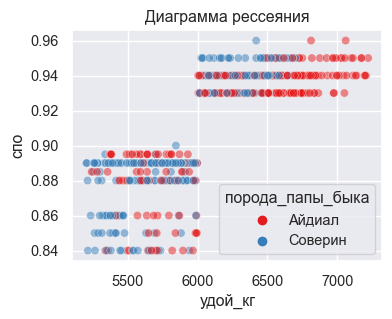

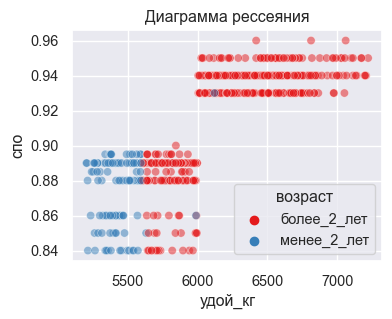

In [53]:
scatter_for_cat('спо')

**Вывод:** Между целевым признаком `удой_кг` и входным признаком `спо` (отношение сахара к протеину в корме коровы) с учетом значения категориальных признаков прослеживается положительная **не** линейная взаимосвязь.

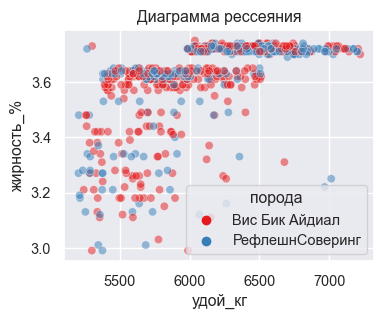

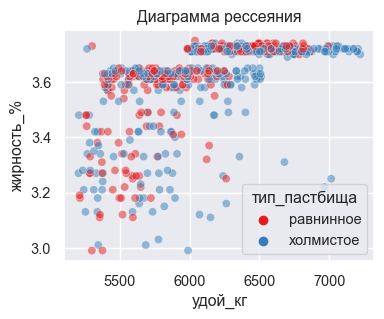

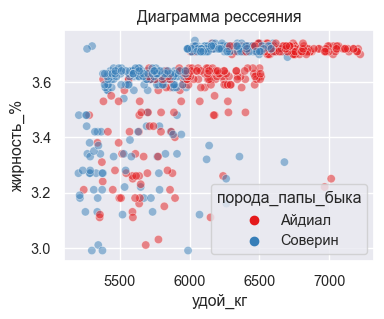

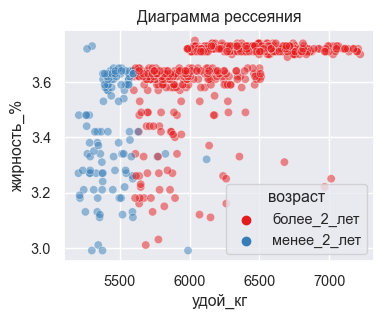

In [54]:
scatter_for_cat('жирность_%')

**Вывод:** Между целевым признаком `удой_кг` и входным признаком `жирность_%` (процентное содержание жиров в молоке) с учетом значения категориальных признаков прослеживается положительная **не** линейная взаимосвязь.

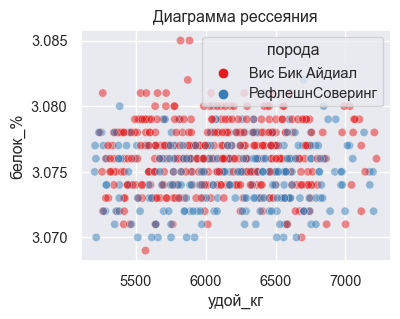

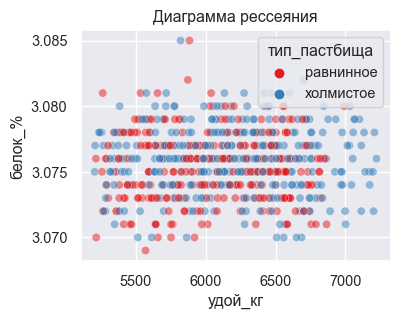

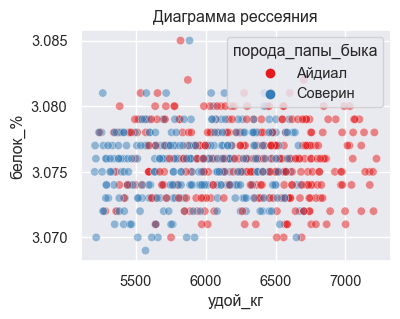

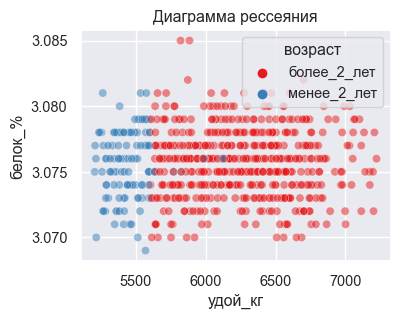

In [55]:
scatter_for_cat('белок_%')

**Вывод:** Между целевым признаком `удой_кг` и входным признаком `белок_%` (процентное содержание белков в молоке) с учетом значения категориальных признаков **не** прослеживается взаимосвязь.

В результате корреляционного анализа данных получены следующие **выводы:**
- Между целевым и входными признаками прослеживается положительная линейная взаимосвязь.
- Нелинейные связнй между целевым и входными признаками есть. 
- Мультиколлинеарность между входными признаками отсутсвует.

<a id='reg'></a>
## Задача регрессии

<a id='mod'></a>
### Первая модель

<a id='prep'></a>
#### Подготовка данных

Подготовим данные датасета `ferma_main.csv` и обучим на них первую модель `LinearRegression`.

Целевой признак: `удой_кг`.

Отберем признаки, которые подходят для модели линейной регрессии, опираясь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета:

- характеристики корма и типа пастбища влияют на удой, поэтому их следует оставить.
- порода коровы и ее отца, возрст коровы также влияют на удой. 
- количество удоя не зависит от характеристик молока, поэтому их не следует брать.


In [56]:
# выделяем в отдельные переменные целевой признак и входные признаки
X = main_ferma.drop(['id',
                     'удой_кг',
                     'белок_%',
                     'жирность_%',
                     'вкус_молока'
                    ], 
                    axis=1)

y = main_ferma['удой_кг']

In [57]:
# разделяем данные на тренировочные и тестовые, фиксируем random_state
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   random_state=RANDOM_STATE)

# разделяем количественные и категориальные признаки
cat_col_names = ['порода', 'порода_папы_быка', 'тип_пастбища', 'возраст']
num_col_names = ['эке', 'сырой_протеин_кг', 'спо']

Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью `StandardScaler`.

In [58]:
# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучаем и трансформируем количественные признаки из тренировочной выборки
X_train[num_col_names] = scaler.fit_transform(X_train[num_col_names])
# выполняем преобразование количественных признаков в тестовой выборке
X_test[num_col_names] = scaler.transform(X_test[num_col_names])

X_train.head()

,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,возраст
616,0.973553,-0.394054,0.570673,РефлешнСоверинг,холмистое,Айдиал,более_2_лет
584,1.666449,0.837203,1.186097,РефлешнСоверинг,холмистое,Соверин,более_2_лет
138,1.358495,-0.239457,1.186097,Вис Бик Айдиал,холмистое,Соверин,более_2_лет
446,-0.181274,0.892416,0.570673,РефлешнСоверинг,холмистое,Айдиал,более_2_лет
473,0.126680,-0.681163,0.878385,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет


Кодируйем категориальные признаки в тренировочной и тестовой выборках с помощью `OneHotEncoder`.

In [59]:
# создаем переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# обучаем и трансформирем категориальные признаки из тренировочной выборки
X_train[cat_col_names] = encoder.fit_transform(X_train[cat_col_names])
# выполнякм преобразование категориальных признаков в тестовой выборке
X_test[cat_col_names] = encoder.transform(X_test[cat_col_names])

# получаем от кодировщика список новых столбцов
encoder_col_names = encoder.get_feature_names()

X_train.tail(10)

,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,возраст
19,-0.181274,-0.879931,-0.506321,1.0,1.0,1.0,0.0
198,0.665599,0.439667,0.878385,0.0,1.0,1.0,0.0
394,0.280657,1.726137,0.570673,0.0,1.0,1.0,0.0
141,1.204518,-0.703249,0.878385,0.0,0.0,1.0,0.0
187,0.280657,-0.581779,0.570673,0.0,1.0,0.0,0.0
305,-0.566217,-0.383012,-0.967889,1.0,0.0,1.0,1.0
501,-1.490079,-0.741898,-1.891027,1.0,1.0,1.0,1.0
190,1.589461,0.262984,1.493810,0.0,0.0,1.0,0.0
422,0.049691,1.394857,1.186097,0.0,0.0,0.0,0.0
538,-1.336102,-0.084860,-0.967889,0.0,0.0,1.0,1.0


<a id='linar'></a>
#### Обучение модели линейной регрессии

In [60]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

<a id='qlt'></a>
#### Оценка качества модели

In [61]:
# рассчитайте значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)


# выведите полученное значение R2
print("R2 LinearRegression =", r2)

R2 LinearRegression = 0.7827293936299928


**Коэффициент детерминации**, описывающий связь между значениями зависимой (целевой) переменной и независимых переменных (признаков), **равен 0.783**. То есть построенная модель объясняет `78%` дисперсии (разбросов значений зависимой переменной) значениями незвисимых признаков. 

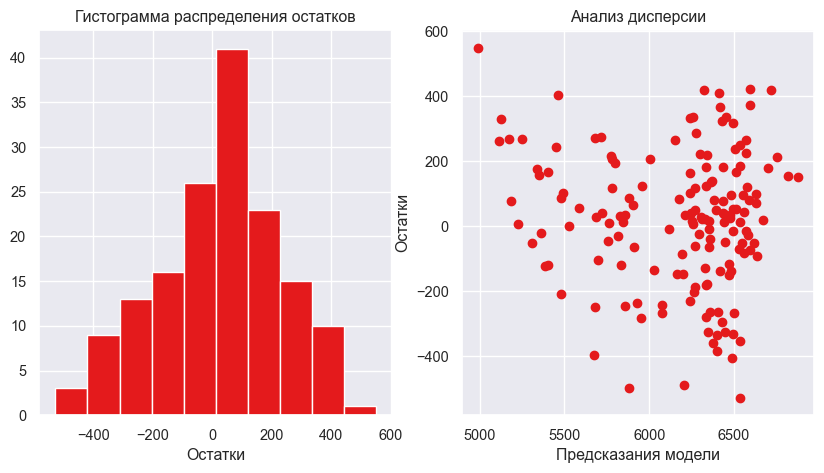

In [62]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

График гистограммы симметричный, остатки распределены нормально, с центром в нуле. А вот дисперсия непостоянна: остатки нелинейно распределены.

**Выводы:**
- R2 модели равно  0.783;
- из анализа остатков следует, что необходимы дополнительные исследования, потому что дисперсия остатков показала, что надо найти и добавить дополнительные признаки, т.к. прослеживается нелинейная взаимосвязь.

<a id='mod2'></a>
### Вторая модель

<a id='prep2'></a>
#### Подготовка данных второй модели

Если посмотреть на [диаграммы рассеяния][5], то на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. 

Исключим нелинейность, чтобы эти признаки были информативны для линейной регрессии:
- `спо` и `удой` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `спо`, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуем `спо` в категориальный бинарный признак, использовав эту границу.
- `эке` и `удой` также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `эке` в квадрате.

[5]:#corr

In [63]:
# функция категоризации сахаро-протеинового отношения
def categorize(spo):
    try:
        if spo >= .9:
            return 1
        else:
            return 0
    except:
        pass

In [64]:
#разбиваем спо на категории
main_ferma['категория_спо'] = main_ferma['спо'].apply(categorize)
#возводим эке в квадрат
main_ferma['эке_в_квадрате'] = main_ferma['эке'] ** 2

main_ferma.tail()

,id,удой_кг,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,категория_спо,эке_в_квадрате
624,625,6812,15.4,1.964,0.94,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16
625,626,5513,12.9,1.700,0.88,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41
626,627,5970,14.4,1.837,0.88,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36
627,628,5746,13.8,1.994,0.89,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44
628,629,6503,16.2,2.283,0.94,Вис Бик Айдиал,холмистое,Соверин,3.71,3.076,вкусно,более_2_лет,1,262.44


In [65]:
# выделяем в отдельные переменные целевой признак и входные признаки
X_2 = main_ferma.drop(['id',
                     'удой_кг',
                     'белок_%',
                     'жирность_%',
                     'вкус_молока',
                     'спо', 'эке'
                    ], 
                    axis=1)

y_2 = main_ferma['удой_кг']

In [66]:
# разделяем данные на тренировочные и тестовые, фиксируем random_state
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
   X_2,
   y_2,
   random_state=RANDOM_STATE)

# разделяем количественные и категориальные признаки
cat_col_names_2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 
                  'возраст', 'категория_спо']
num_col_names_2 = ['эке_в_квадрате', 'сырой_протеин_кг']

Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью `StandardScaler`.

In [67]:
# создаем переменную с экземпляром класса StandardScaler()
scaler_2 = StandardScaler()

# обучаем и трансформируем количественные признаки из тренировочной выборки
X_train_2[num_col_names_2] = scaler_2\
.fit_transform(X_train_2[num_col_names_2])
# выполняем преобразование количественных признаков в тестовой выборке
X_test_2[num_col_names_2] = scaler_2\
.transform(X_test_2[num_col_names_2])

X_train_2.head()

,сырой_протеин_кг,порода,тип_пастбища,порода_папы_быка,возраст,категория_спо,эке_в_квадрате
616,-0.394054,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,1,0.982424
584,0.837203,РефлешнСоверинг,холмистое,Соверин,более_2_лет,1,1.765988
138,-0.239457,Вис Бик Айдиал,холмистое,Соверин,более_2_лет,1,1.412380
446,0.892416,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,1,-0.227076
473,-0.681163,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,1,0.083671


Кодируйем категориальные признаки в тренировочной и тестовой выборках с помощью `OneHotEncoder`.

In [68]:
# создаем переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder_2 = OneHotEncoder(drop='first', sparse=False)

# обучаем и трансформирем категориальные признаки из тренировочной выборки
X_train_2[cat_col_names_2] = encoder_2\
.fit_transform(X_train_2[cat_col_names_2])
# выполнякм преобразование категориальных признаков в тестовой выборке
X_test_2[cat_col_names_2] = encoder_2\
.transform(X_test_2[cat_col_names_2])

# получаем от кодировщика список новых столбцов
encoder_col_names_2 = encoder_2.get_feature_names()

X_train_2.tail(10)

,сырой_протеин_кг,порода,тип_пастбища,порода_папы_быка,возраст,категория_спо,эке_в_квадрате
19,-0.879931,1.0,1.0,1.0,0.0,0.0,-0.227076
198,0.439667,0.0,1.0,1.0,0.0,1.0,0.648104
394,1.726137,0.0,1.0,1.0,0.0,1.0,0.242258
141,-0.703249,0.0,0.0,1.0,0.0,1.0,1.238790
187,-0.581779,0.0,1.0,0.0,0.0,1.0,0.242258
305,-0.383012,1.0,0.0,1.0,1.0,0.0,-0.603454
501,-0.741898,1.0,1.0,1.0,1.0,0.0,-1.452114
190,0.262984,0.0,0.0,1.0,0.0,1.0,1.676782
422,1.394857,0.0,0.0,0.0,0.0,1.0,0.005180
538,-0.084860,0.0,0.0,1.0,1.0,0.0,-1.316028


<a id='linar2'></a>
#### Обучение второй модели линейной регрессии

In [69]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2)
predictions_2 = model_lr_2.predict(X_test_2)

<a id='qlt2'></a>
#### Оценка качества второй модели

In [70]:
# рассчитайте значения R2 для линейной регрессии
r2_2 = r2_score(y_test_2, predictions_2)


# выведите полученное значение R2
print("R2 LinearRegression =", r2_2)

R2 LinearRegression = 0.8034106600131643


**Коэффициент детерминации**, описывающий связь между значениями зависимой (целевой) переменной и независимых переменных (признаков), **равен 0.803**. То есть построенная модель объясняет `80%` дисперсии (разбросов значений зависимой переменной) значениями незвисимых признаков. 

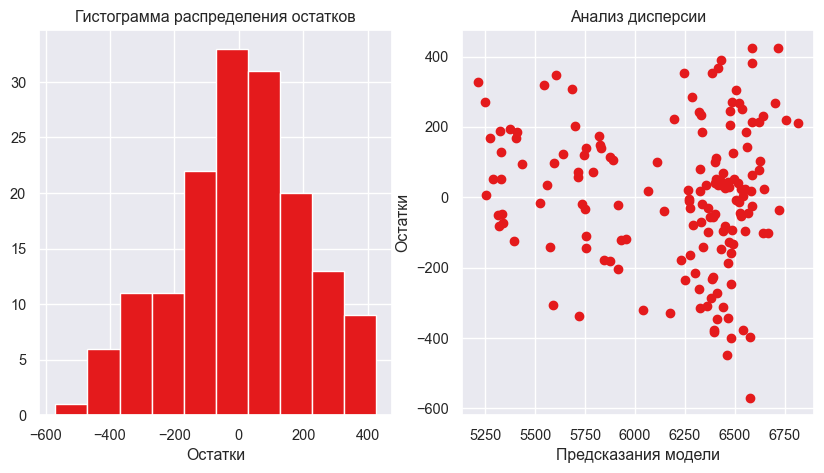

In [71]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals_2 = y_test_2 - predictions_2

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки распределены нормально, с пиком в нуле, но распределение смещено влево, то есть прогнозы модели больше истинных значений. Дисперсия также непостоянна: остатки нелинейно распределены.

**Выводы:**
- R2 модели равно  0.803;
- из анализа остатков следует, что необходимы дополнительные исследования, потому что распределение показало, что предсказания модели часто больше истинных значений, а дисперсия остатков показала, что надо найти и добавить дополнительные признаки, т.к. прослеживается нелинейная взаимосвязь.

<a id='mod3'></a>
### Третья модель

<a id='prep3'></a>
#### Подготовка данных второй модели

In [72]:
print('Кол-во записей в main_ferma:', len(main_ferma))
print('Кол-во записей в dad_ferma:', len(dad_ferma))

Кол-во записей в main_ferma: 628
Кол-во записей в dad_ferma: 629


In [73]:
#соединяем два датафрейма
ferma = dad_ferma.merge(main_ferma, on='id', how='right')
print('Кол-во записей в ferma:', len(ferma))
ferma.head()

Кол-во записей в ferma: 628


,id,имя_папы,удой_кг,эке,сырой_протеин_кг,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,категория_спо,эке_в_квадрате
0,1,Буйный,5863,14.2,1.743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,Соловчик,5529,12.8,2.138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,Барин,5810,14.0,1.854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,Буйный,5895,12.4,2.012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,Барин,5302,12.8,1.675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [74]:
# выделяем в отдельные переменные целевой признак и входные признаки
X_3 = ferma.drop(['id',
                  'удой_кг',
                  'эке', 'спо',
                  'белок_%',
                  'жирность_%',
                  'вкус_молока'
                 ], 
                 axis=1)

y_3 = ferma['удой_кг']

In [75]:
X_3.head()

,имя_папы,сырой_протеин_кг,порода,тип_пастбища,порода_папы_быка,возраст,категория_спо,эке_в_квадрате
0,Буйный,1.743,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,201.64
1,Соловчик,2.138,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84
2,Барин,1.854,РефлешнСоверинг,холмистое,Соверин,более_2_лет,0,196.00
3,Буйный,2.012,РефлешнСоверинг,холмистое,Айдиал,более_2_лет,0,153.76
4,Барин,1.675,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84


In [76]:
# разделяем данные на тренировочные и тестовые, фиксируем random_state
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
   X_3,
   y_3,
   random_state=RANDOM_STATE)

# разделяем количественные и категориальные признаки
cat_col_names_3 = ['имя_папы', 'порода', 'тип_пастбища', 
                   'порода_папы_быка', 'возраст', 'категория_спо']
num_col_names_3 = ['сырой_протеин_кг', 'эке_в_квадрате']

Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью `StandardScaler` и кодируйем категориальные признаки в тренировочной и тестовой выборках с помощью `OneHotEncoder`.

In [77]:
scaler_3 = StandardScaler()

# обучаем и трансформируем количественные признаки из тренировочной выборки
X_train_3_scaled = scaler_3.fit_transform(X_train_3[num_col_names_3])
# преобразовываем количественные признаки в тестовой выборке
X_test_3_scaled = scaler_3.transform(X_test_3[num_col_names_3])

In [78]:
# создаем переменную с экземпляром класса OneHotEncoder()
# вкл параметр для избегания появления дамми-ошибок,
# откл sparse-отображение
encoder_3 = OneHotEncoder(drop='first', sparse=False)

# обучаем и трансформируем категориальные признаки из тренировочной выборки
X_train_3_ohe = encoder_3.fit_transform(X_train_3[cat_col_names_3])
# выполняем преобразование категориальных признаков в тестовой выборке
X_test_3_ohe = encoder_3.transform(X_test_3[cat_col_names_3])

In [79]:
# список новых столбцов
encoder_3_col_names = encoder_3.get_feature_names()

# создаём тренировочный и тестовый датафреймы 
# из закодированных и отмасштабированных данных

X_train_3_ohe = pd.DataFrame(X_train_3_ohe, columns=encoder_3_col_names)
X_test_3_ohe = pd.DataFrame(X_test_3_ohe, columns=encoder_3_col_names)

X_train_3_scaled = pd.DataFrame(X_train_3_scaled, columns=num_col_names_3)
X_test_3_scaled = pd.DataFrame(X_test_3_scaled, columns=num_col_names_3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_3 = pd.concat([X_train_3_ohe, X_train_3_scaled], axis=1)
X_test_3 = pd.concat([X_test_3_ohe, X_test_3_scaled], axis=1)

X_train_3.head()

,x0_Буйный,x0_Геркулес,x0_Соловчик,x1_РефлешнСоверинг,x2_холмистое,x3_Соверин,x4_менее_2_лет,x5_1,сырой_протеин_кг,эке_в_квадрате
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.394054,0.982424
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.837203,1.765988
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.239457,1.412380
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.892416,-0.227076
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.681163,0.083671


<a id='linar3'></a>
#### Обучение третьей модели линейной регрессии

In [80]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3)
predictions_3 = model_lr_3.predict(X_test_3)

<a id='qlt3'></a>
#### Оценка качества третьей модели

In [81]:
# рассчитайте значения R2 для линейной регрессии
r2_3 = r2_score(y_test_3, predictions_3)


# выведите полученное значение R2
print("R2 LinearRegression =", r2_3)

R2 LinearRegression = 0.8310599163402524


**Коэффициент детерминации**, описывающий связь между значениями зависимой (целевой) переменной и независимых переменных (признаков), **равен 0.831**. То есть построенная модель объясняет `83%` дисперсии (разбросов значений зависимой переменной) значениями незвисимых признаков. 

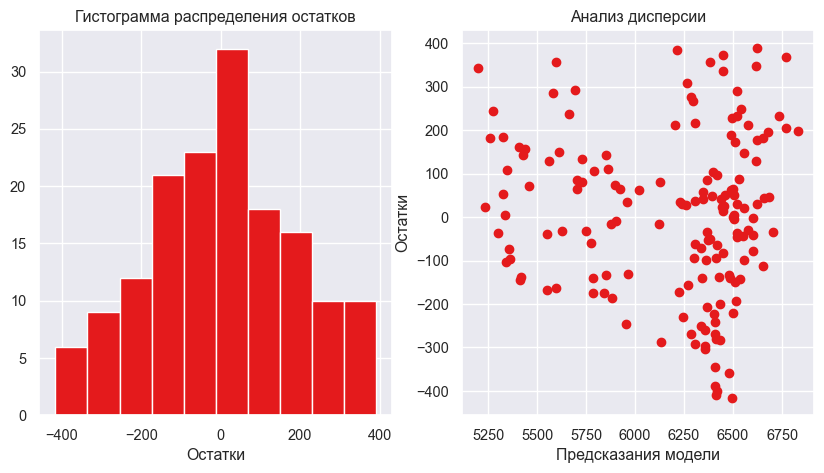

In [82]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals_3 = y_test_3 - predictions_3

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x=residuals_3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[1].scatter(x=predictions_3, y=residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки распределены нормально, с пиком в нуле. Дисперсия непостоянна: остатки нелинейно распределены.

**Выводы:**
- R2 модели равно  0.831;
- гистограмма остатков показывает нормальное распределение, но дисперсия указывает на неленейную зависимость.

По сравнению с первой моделью R2 вырасло на 4.8 процентных пункта, но дисперсия всё ещё неравномерная.

<a id='metr'></a>
### Оценка качества моделей по метрикам

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [83]:
# функция трех метрик
def three_metrics(model_y_test, model_pred):
    mse = mean_squared_error(model_y_test, 
                             model_pred)
    rmse = mean_squared_error(model_y_test, 
                              model_pred, 
                              squared=False)
    mae = mean_absolute_error(model_y_test,
                             model_pred)
    print('MSE: ', mse)
    print('RMSE:', rmse)
    return print('MAE: ', mae)

In [84]:
print('Первая модель')
three_metrics(y_test, predictions)
print('Вторая модель')
three_metrics(y_test_2, predictions_2)
print('Третья модель')
three_metrics(y_test_3, predictions_3)

Первая модель
MSE:  44472.50216316742
RMSE: 210.88504490164166
MAE:  166.5900948605835
Вторая модель
MSE:  40239.31259680555
RMSE: 200.59738930705342
MAE:  159.27910948449536
Третья модель
MSE:  34579.86499659788
RMSE: 185.9566212765705
MAE:  150.0603691660629


Метрики показывают, что лучшая модель - третья. По `rmse` она в среднем ошибается на `185.96 кг`, а по `mae` - на `105.06 кг`, по коэффициенту детерминации (`R2`) третья модель также показала лучший результат -  предсказания правильны в `83%` случаев.

In [85]:
# вычисляем доверительный интервал
st.norm.interval(
    alpha=0.83, 
    loc=np.mean(predictions_3), 
    scale=st.sem(predictions_3))

(6136.783418768936, 6230.535368039334)

**Вывод:** по метрикам лучшей моделью является **третья** - её корень среднеквадратичной ошибки равен `185.96 кг`, средняя абсолютная ошибка - `150.06 кг`, а коэффициент детерминации - `0.83`. 

Существует вероятность `83%`, что доверительный интервал **третьей модели** `[6136.78; 6230.54]` содержит истинный средний удой коров в кг.

<a id='predict'></a>
### Прогноз удоя коров

Добавим недостающие признаки в датафрейм `cow_buy`: запишем средние значения умноженные на `5%` из `main_ferma`.

In [86]:
# считаем среднее значение ЭКЕ, умножаем на 5%
# и добавляем в cow_buy
cow_buy['эке'] = main_ferma['эке']\
.mean() * 1.05

# считаем среднее значение СПО, умножаем на 5%
# и добавляем в cow_buy
cow_buy['спо'] = main_ferma['спо'].mean() * 1.05

# считаем среднее значение сырого протеина, умножаем на 5%
# и добавляем в cow_buy
cow_buy['сырой_протеин_кг'] = main_ferma['сырой_протеин_кг']\
.mean() * 1.05

Подготовим данные.

In [87]:
# добавляем категорию СПО
cow_buy['категория_спо'] = cow_buy['спо'].apply(categorize)
# возводим эке в квадрат
cow_buy['эке_в_квадрате'] = cow_buy['эке'] ** 2
cow_buy.head(3)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке,спо,сырой_протеин_кг,категория_спо,эке_в_квадрате
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2.019948,1,233.361138
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2.019948,1,233.361138
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2.019948,1,233.361138


In [88]:
predict_milk = cow_buy.drop(['эке', 'спо',
                  'текущая_жирность_%',
                  'текущий_уровень_белок_%'
                 ], 
                 axis=1)
#меняем порядок столбцов
predict_milk = predict_milk[['имя_папы', 
                            'сырой_протеин_кг', 
                            'порода', 
                            'тип_пастбища', 
                            'порода_папы_быка', 
                            'возраст', 
                            'категория_спо', 
                            'эке_в_квадрате']]
predict_milk.head(3)

,имя_папы,сырой_протеин_кг,порода,тип_пастбища,порода_папы_быка,возраст,категория_спо,эке_в_квадрате
0,Геркулес,2.019948,Вис Бик Айдиал,холмистое,Айдиал,более_2_лет,1,233.361138
1,Буйный,2.019948,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,1,233.361138
2,Барин,2.019948,РефлешнСоверинг,равнинное,Соверин,более_2_лет,1,233.361138


Масштабируем количественные признаки с помощью `StandardScaler` и кодируйем категориальные признаки с помощью `OneHotEncoder`.

In [89]:
# преобразовываем количественные признаки
predict_milk_scaled = scaler_3.transform(predict_milk[num_col_names_3])


# выполняем преобразование категориальных признаков
predict_milk_ohe = encoder_3.transform(predict_milk[cat_col_names_3])

# создаём датафреймы из закодированных и отмасштабированных данных
predict_milk_ohe = pd.DataFrame(predict_milk_ohe, columns=encoder_3_col_names)
predict_milk_scaled = pd.DataFrame(predict_milk_scaled, columns=num_col_names_3)

# объединяем все преобразованные данные в датафрейм
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
predict_milk = pd.concat([predict_milk_ohe, predict_milk_scaled], axis=1)

predict_milk.head(3)

,x0_Буйный,x0_Геркулес,x0_Соловчик,x1_РефлешнСоверинг,x2_холмистое,x3_Соверин,x4_менее_2_лет,x5_1,сырой_протеин_кг,эке_в_квадрате
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.560846,0.546338
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.560846,0.546338
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.560846,0.546338


Получим прогнозы удоя коров.

In [90]:
milk_predictions = model_lr_3.predict(predict_milk)

In [91]:
print(milk_predictions >= 6000)
milk_predictions

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


array([6607.27253763, 6266.4069582 , 6281.29396892, 6594.19198368,
       6522.94823431, 6328.33397065, 6607.27253763, 6486.75812308,
       6281.29396892, 6373.84081879, 6371.6363311 , 6548.68513554,
       6607.27253763, 6107.76332415, 6281.29396892, 6594.19198368,
       6371.6363311 , 6328.33397065, 6486.75812308, 6522.94823431])

По прогнозам у всех отобранных фермером коровы удой составит не менее 6000 кг.

<a id='class'></a>
## Задача классификации

Подготовиим данные датасета `main_ferma` и обучим на них модель `LogisticRegression`.

Целевой признак: `вкус_молока`.

<a id='prep_c'></a>
### Подготовка данных

In [92]:
# выделяем в отдельные переменные целевой признак и входные признаки
X_class = ferma.drop(['id',
                  'удой_кг',
                  'эке', 'спо',
                  'белок_%',
                  'жирность_%',
                  'вкус_молока'
                 ], 
                 axis=1)

y_class = ferma['вкус_молока'] 

In [93]:
y_class = y_class.replace(['вкусно','не вкусно'],[1, 0])

In [94]:
X_class.head(3)

,имя_папы,сырой_протеин_кг,порода,тип_пастбища,порода_папы_быка,возраст,категория_спо,эке_в_квадрате
0,Буйный,1.743,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,201.64
1,Соловчик,2.138,Вис Бик Айдиал,равнинное,Соверин,менее_2_лет,0,163.84
2,Барин,1.854,РефлешнСоверинг,холмистое,Соверин,более_2_лет,0,196.00


In [95]:
# разделяем данные на тренировочные и тестовые, фиксируем random_state
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
   X_class,
   y_class,
   random_state=RANDOM_STATE)

Масштабируем количественные признаки для тренировочной и тестовой выборок с помощью `StandardScaler` и кодируйем категориальные признаки в тренировочной и тестовой выборках с помощью `OneHotEncoder`.

In [96]:
scaler_class = StandardScaler()

# обучаем и трансформируем количественные признаки из тренировочной выборки
scaled_train_X = scaler_class\
.fit_transform(X_train_class[num_col_names_3])
# преобразовываем количественные признаки в тестовой выборке
scaled_test_X = scaler_class\
.transform(X_test_class[num_col_names_3])

# создаем переменную с экземпляром класса OneHotEncoder()
# вкл параметр для избегания появления дамми-ошибок,
# откл sparse-отображение
encoder_class = OneHotEncoder(drop='first', sparse=False)

# обучаем и трансформируем категориальные признаки из тренировочной выборки
train_class_ohe = encoder_class\
.fit_transform(X_train_class[cat_col_names_3])
# выполняем преобразование категориальных признаков в тестовой выборке
test_class_ohe = encoder_class\
.transform(X_test_class[cat_col_names_3])

# список новых столбцов
encoder_class_names = encoder_class.get_feature_names()

# создаём тренировочный и тестовый датафреймы 
# из закодированных и отмасштабированных данных

train_class_ohe = pd\
.DataFrame(train_class_ohe, columns=encoder_class_names)
test_class_ohe = pd\
.DataFrame(test_class_ohe, columns=encoder_class_names)

scaled_train_X = pd\
.DataFrame(scaled_train_X, columns=num_col_names_3)
scaled_test_X = pd\
.DataFrame(scaled_test_X, columns=num_col_names_3)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train_class = pd.\
concat([train_class_ohe, scaled_train_X], axis=1)
X_test_class = pd\
.concat([test_class_ohe, scaled_test_X], axis=1)

X_train_class.head(3)

,x0_Буйный,x0_Геркулес,x0_Соловчик,x1_РефлешнСоверинг,x2_холмистое,x3_Соверин,x4_менее_2_лет,x5_1,сырой_протеин_кг,эке_в_квадрате
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.394054,0.982424
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.837203,1.765988
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.239457,1.412380


<a id='log'></a>
### Обучение модели логической регрессии

In [97]:
clf = LogisticRegression()

clf = clf.fit(X_train_class, y_train_class)
class_pred = clf.predict(X_test_class)

<a id='qlt_c'></a>
### Оценка качества модели

In [98]:
acc = accuracy_score(y_test_class, class_pred)
recall = recall_score(y_test_class, class_pred)
precision = precision_score(y_test_class, class_pred)

print('accuracy:  ', round(acc ,3))
print('recall:    ', round(recall ,3))
print('precision: ', round(precision,3))

accuracy:   0.535
recall:     0.678
precision:  0.581


- По метрике `accuracy` модель верно определяет вкус молока в 54% случаев.
- По метрике `recall` модель верно определяет вкус молока в 68% случаев.
- По метрике `precision` модель верно определяет вкус молока в 58% случаев.

Построим матрицу ошибок.

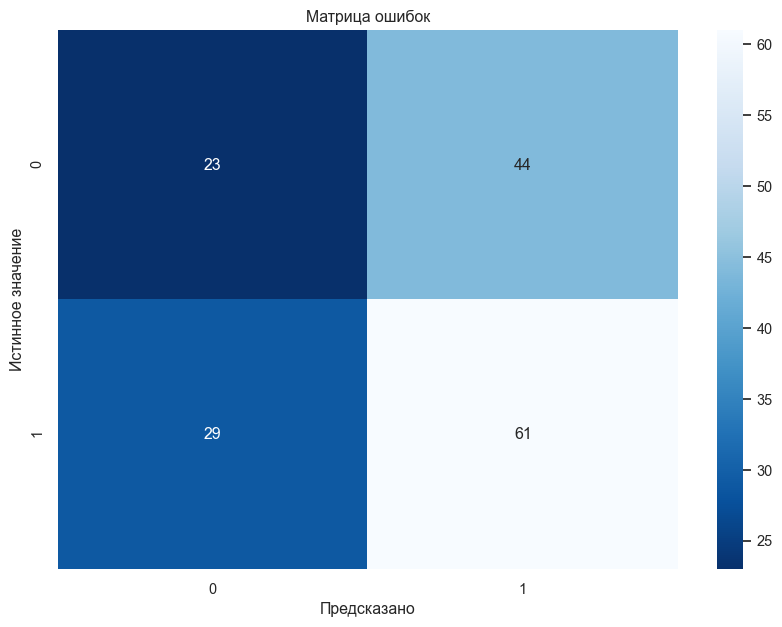

In [99]:
cm = confusion_matrix(y_test_class, class_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказано');

Модель 44 раза ошибочно предсказывает, что молоко `вкусное`, и 29 раз, что оно `не вкусное`.

При покупке коров критичнее всего ошибка второго рода. Главное для заказчика — вкусное молоко, значит, нельзя допустить ошибочное предсказание невкусного молока как вкусного. 

В данном случае более важной метрикой является `precision`.

In [100]:
proba = clf.predict_proba(X_test_class)[:,1]

data = pd.DataFrame(zip(y_test_class, proba),
columns = ['y_valid', 'proba']).sort_values(by='proba',ascending=False)


thresholds = [round(i, 2) for i in np.linspace(0.6, 0.9, num=8, endpoint=False)]
for i in thresholds:
    data['y_prad_' + str(i)] = data['proba'].apply(lambda x: 1 if x >= i else 0)

data.head(40)

,y_valid,proba,y_prad_0.6,y_prad_0.64,y_prad_0.68,y_prad_0.71,y_prad_0.75,y_prad_0.79,y_prad_0.82,y_prad_0.86
15,1,0.926264,1,1,1,1,1,1,1,1
44,1,0.921978,1,1,1,1,1,1,1,1
146,1,0.894301,1,1,1,1,1,1,1,1
36,1,0.888394,1,1,1,1,1,1,1,1
0,1,0.887802,1,1,1,1,1,1,1,1
132,1,0.876382,1,1,1,1,1,1,1,1
100,1,0.872110,1,1,1,1,1,1,1,1
39,1,0.868884,1,1,1,1,1,1,1,1
19,1,0.862543,1,1,1,1,1,1,1,1
34,1,0.854503,1,1,1,1,1,1,1,0


Оптимальный порог принадлежности равен 0.82.

In [118]:
THRESHOLD = 0.82
preds = np.where(clf.predict_proba(X_test_class)[:,1] > THRESHOLD, 1, 0)
precision_x = precision_score(y_test_class, preds)
recall_x = recall_score(y_test_class, preds)
acc_x = accuracy_score(y_test_class, preds)


print('accuracy:      ', round(acc ,3))
print('accuracy new:  ', round(acc_x ,3))
print('recall:        ', round(recall ,3))
print('recall new:    ', round(recall_x ,3))
print('precision:     ', round(precision,3))
print('precision new: ', round(precision_x,3))

accuracy:       0.535
accuracy new:   0.51
recall:         0.678
recall new:     0.156
precision:      0.581
precision new:  0.933


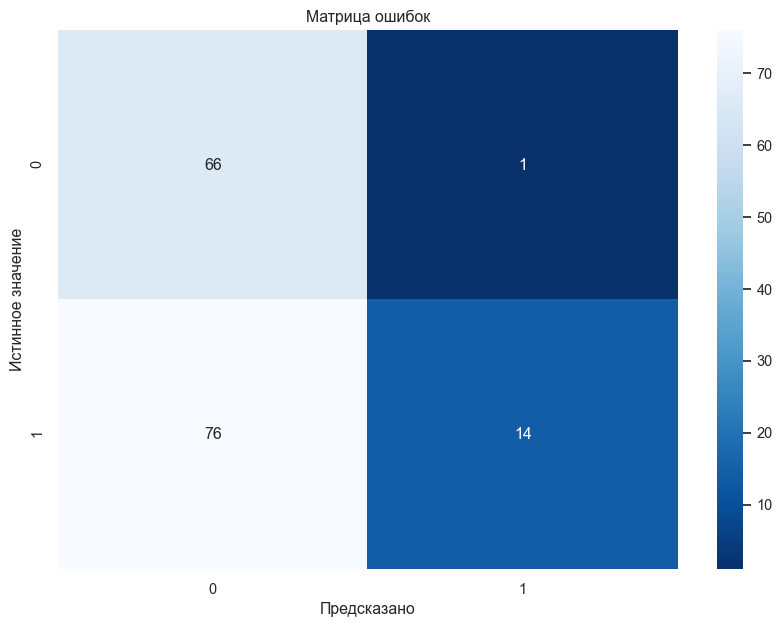

In [119]:
cm = confusion_matrix(y_test_class, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказано');

При пороге 0.82:
- `accuracy` уменьшился на 0.025 (0.510)
- `precision` **увеличился** на 0.352 (0.933)
- `recall` уменьшился на 0.522 (0.156)

**Вывод:** при пороге принадлежности к классам равным `0.82` предсказания логической модели правильны в `51%` случае по метрике `accuracy`, в `35%` по метрике `recall` и в `93%` по метрике `precision`.
Предсказания модели часто ошибочны следует дальше улучшать модель.

<a id='predict2'></a>
### Прогноз вкуса молока

Подготавливаем данные.

In [103]:
X_for_milk = cow_buy.drop([
                  'эке', 'спо',
                  'текущий_уровень_белок_%',
                  'текущая_жирность_%',
                 ], 
                 axis=1)

In [104]:
# преобразовываем количественные признаки в тестовой выборке
scaled_X_for_milk = scaler_class\
.transform(X_for_milk[num_col_names_3])


# выполняем преобразование категориальных признаков в тестовой выборке
X_for_milk_ohe = encoder_class\
.transform(X_for_milk[cat_col_names_3])

# создаём датафреймы 
# из закодированных и отмасштабированных данных


X_for_milk_ohe = pd\
.DataFrame(X_for_milk_ohe, columns=encoder_class_names)

scaled_X_for_milk = pd\
.DataFrame(scaled_X_for_milk, columns=num_col_names_3)

# объединяем все преобразованные данные в датафрейм

X_for_milk = pd\
.concat([X_for_milk_ohe, scaled_X_for_milk], axis=1)

X_for_milk.head(3)

,x0_Буйный,x0_Геркулес,x0_Соловчик,x1_РефлешнСоверинг,x2_холмистое,x3_Соверин,x4_менее_2_лет,x5_1,сырой_протеин_кг,эке_в_квадрате
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.560846,0.546338
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.560846,0.546338
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.560846,0.546338


In [114]:
milk_preds = np.where(clf.predict_proba(X_for_milk)[:,1] > THRESHOLD, 1, 0)
milk_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<a id='fin'></a>
## Общие выводы

In [120]:
cow_buy['вкус_молока'] = milk_preds
cow_buy['удой_кг'] = milk_predictions

cow_buy.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке,спо,сырой_протеин_кг,категория_спо,эке_в_квадрате,вкус_молока,удой_кг
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,0.958744,2.019948,1,233.361138,0,6607.272538
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,0.958744,2.019948,1,233.361138,0,6266.406958
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,0.958744,2.019948,1,233.361138,0,6281.293969
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,0.958744,2.019948,1,233.361138,0,6594.191984
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,0.958744,2.019948,1,233.361138,0,6522.948234


In [121]:
print('Коровы с удоем более 6000 килограммов в год и вкусным молоком')
cow_buy[(cow_buy['удой_кг'] > 6000) & (cow_buy['вкус_молока'] == 1)]

Коровы с удоем более 6000 килограммов в год и вкусным молоком


,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке,спо,сырой_протеин_кг,категория_спо,эке_в_квадрате,вкус_молока,удой_кг


**Вывод:** с минимальным риском для себя фермер может купить `0` коров. Модели предсказали, что у всех отобранных коров с большой вероятностью средний удой превысит 6.000 кг за год, но молоко каждой будет невкусным.

Для улучшения предсказаний, необходимо больше данных, а также более строго подойти к критериям отбора вкусного и невкусного молока.

В данной работе для улучшения линейной регрессионной модели, использовались масштабирование, стандартизация и кодирование признаков.

Результаты регрессионной модели можно улучшить: возможно, есть неучтенная информация, дополнительные признаки, влияющие на целевые.

При анализе рисков или экономических расчётов моделей классификации (в т.ч. логистической регрессии) важны метрики `accuracy`, `precision` и `recall`.

[Наверх][1]

[1]:#task